In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parte 1: Numpy:

#### 1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [46]:
x = np.full((1, 1000), True)
print("Tamaño en bytes de un booleano: ", x.itemsize)
print("Tamaño en bytes del array:", x.size * x.itemsize)

Tamaño en bytes de un booleano:  1
Tamaño en bytes del array: 1000


#### 2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [47]:
array=np.arange(100,-1,-2)
array[-10:]

array([18, 16, 14, 12, 10,  8,  6,  4,  2,  0])

#### 3. Dado el array 
$$
\begin{array}{cc} 
 2 & 4 & 5 & 6\\
 0 & 3 & 7 & 4\\
8 & 8 & 5 & 2\\
1 & 5 & 6 & 1
\end{array}
$$
#### Seleccione con una instrucción el subarray de elementos
$$
\begin{array}{cc} 
0 &3 &7& 4
\end{array}
$$
#### Después, seleccione el subarray de elementos
$$
\begin{array}{cc} 
2 &5\\
8 &5
\end{array}
$$

In [48]:
array = np.array([[2,4,5,6],[0,3,7,4],[8,8,5,2], [1,5,6,1]])
subarray1 = array[1]
subarray2 = array[[0, 0, 2, 2], [0, 2 ,0, 2]].reshape((2,2))

print(f'''Primer subarray {subarray1}''')
print(f'''Segundo subarray {subarray2}''')

Primer subarray [0 3 7 4]
Segundo subarray [[2 5]
 [8 5]]


#### 4.  Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9], obtenga la media aritmética de la diferencia (a-b).

In [49]:
a = np.array([1,4,2,7])
b = np.array([1,3,2,9])
diferencia = a - b
print(f'''Diferencia de los arrays: {diferencia}''')
print(f'''Media : {diferencia.mean()}''')


Diferencia de los arrays: [ 0  1  0 -2]
Media : -0.25


#### 5. Tengo valores de cordenadas (x, y) en las columnas del array
$$
\begin{array}{cc} 
1.33 &4.5\\
30.0 &10.7\\
70.2 &0.5
\end{array}
$$
##### Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [50]:
coordenadas = np.array([[1.33,4.5], [30.0, 10.7], [70.2,0.5]])
nuevas_coordenadas = np.array([[37.1, -3.6]])
coordenadas = np.append(coordenadas, nuevas_coordenadas, axis=0)
print(coordenadas)

[[ 1.33  4.5 ]
 [30.   10.7 ]
 [70.2   0.5 ]
 [37.1  -3.6 ]]


#### 6. Copie el array del ejercicio anterior. Traspóngalo. Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [51]:
coordenadas_copia = np.copy(coordenadas)
coordenadas_copia = np.transpose(coordenadas_copia)
nuevas_coordenadas = np.array([[10.8, 35.8], [3.0, 12.0]])
coordenadas_copia = np.append(coordenadas_copia, nuevas_coordenadas, axis=1)
print(coordenadas_copia)
print(898)

[[ 1.33 30.   70.2  37.1  10.8  35.8 ]
 [ 4.5  10.7   0.5  -3.6   3.   12.  ]]
898


# Parte 2: Exploración y Minería de Datos:

In [52]:
df = pd.read_csv('./NucleosPoblacion.csv')
print(df.sort_values(by='Y', ascending=False).to_markdown())


|     |   FID |   OBJECTID | Texto                                           |        Poblacion |   CodMun | Municipio                                       |   CodProvin | Provincia              |           X |       Y |
|----:|------:|-----------:|:------------------------------------------------|-----------------:|---------:|:------------------------------------------------|------------:|:-----------------------|------------:|--------:|
| 104 |   104 |        105 | Viveiro                                         |  16211           |    27066 | Viveiro                                         |          27 | Lugo                   |  -7.58877   | 43.6256 |
| 447 |   447 |        448 | Lluanco/Luanco                                  |  10788           |    33025 | Gozón                                           |          33 | Asturias               |  -5.79277   | 43.614  |
| 443 |   443 |        444 | Candás                                          |  11000           |    33014 | Car

#### 1. ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [53]:
df_poblacion = df.loc[df['Poblacion'] > 100000]
print(f'''Cantidad de municipios con mas de 100000 habitantes: {df_poblacion.shape[0]}''')

Cantidad de municipios con mas de 100000 habitantes: 62


#### 2. Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:

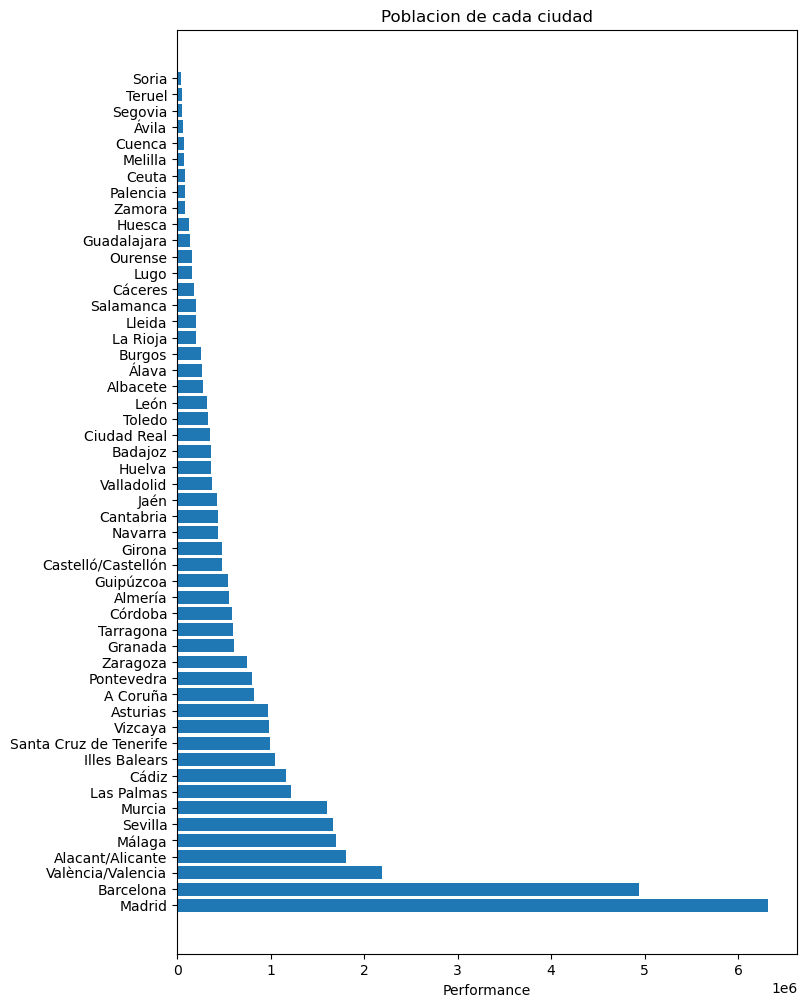

In [54]:
df_new = df.groupby(df['Provincia'], as_index=False).aggregate({'Poblacion':'sum'}).sort_values('Poblacion')
df_new = df_new.reset_index(drop=True)
fig, ax = plt.subplots(figsize=(8,12))
y_pos = np.arange(len(df_new['Provincia'].unique()))
ax.barh(df_new['Provincia'], df_new['Poblacion'], align='center')
ax.set_xlabel('Performance')
ax.invert_yaxis()
ax.set_yticks(y_pos, labels=df_new['Provincia'].unique())

ax.set_title('Poblacion de cada ciudad')

plt.show()

### a. ¿Cuál es la segunda ciudad más poblada?
La segunda ciudad mas poblada es Barcelona.

In [55]:
df_new.loc[df_new['Provincia'] =='Barcelona']

,Provincia,Poblacion
50,Barcelona,4934795.0


### b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?
Granada ocupa la posicion 17

In [56]:
granada_index = df_new.index[df_new['Provincia'] == 'Granada'][0]
df_new.shape[0] - granada_index

17

#### 3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [57]:
df_poblacion = df.loc[(df['Poblacion'] > 5000) & ((df['Provincia'] == 'Cáceres') | (df['Provincia'] == 'Badajoz'))]
display(df_poblacion)
print(f'''Cantidad de municipios de Extremadura con mas de 5000 habitantes: {df_poblacion.shape[0]}''')

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
41,41,42,Almendralejo,33975.0,6011,Almendralejo,6,Badajoz,-6.407780,38.684453
42,42,43,Badajoz,150376.0,6015,Badajoz,6,Badajoz,-6.970997,38.878743
43,43,44,Mérida,57127.0,6083,Mérida,6,Badajoz,-6.344172,38.917388
44,44,45,Montijo,16279.0,6088,Montijo,6,Badajoz,-6.617585,38.909787
45,45,46,Olivenza,11906.0,6095,Olivenza,6,Badajoz,-7.099598,38.685660
46,46,47,Villafranca de los Barros,13266.0,6149,Villafranca de los Barros,6,Badajoz,-6.339905,38.561153
47,47,48,Zafra,16433.0,6158,Zafra,6,Badajoz,-6.419306,38.426179
48,48,49,Cáceres,94179.0,10037,Cáceres,10,Cáceres,-6.371211,39.473168
49,49,50,Coria,12962.0,10067,Coria,10,Cáceres,-6.535874,39.984393
50,50,51,Plasencia,41447.0,10148,Plasencia,10,Cáceres,-6.092682,40.029405


Cantidad de municipios de Extremadura con mas de 5000 habitantes: 14


#### 4.  ¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [58]:
max_latitud = df.aggregate({'Y':'max'})['Y']
df.loc[df['Y'] == max_latitud][['Municipio', 'Provincia', 'Poblacion']]

,Municipio,Provincia,Poblacion
104,Viveiro,Lugo,16211.0


#### 5. Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Granada. 

In [59]:
granada_df = df.loc[df['Provincia'] == 'Granada'][['Municipio', 'Provincia', 'Poblacion']]
display(granada_df)
print(f'''Media: {granada_df['Poblacion'].mean()}''')
print(f'''Mediana: {granada_df['Poblacion'].median()}''')
print(f'''Desviacion Estandar: {granada_df['Poblacion'].std()}''')
print(f'''Maximo: {granada_df['Poblacion'].max()}''')
print(f'''Minimo: {granada_df['Poblacion'].min()}''')


,Municipio,Provincia,Poblacion
266,Albolote,Granada,17637.0
267,Almuñécar,Granada,27703.0
268,Armilla,Granada,21895.0
269,Atarfe,Granada,15945.0
270,Baza,Granada,21982.0
271,Churriana de la Vega,Granada,12448.0
272,Granada,Granada,239154.0
273,Guadix,Granada,20407.0
274,Huétor Vega,Granada,11551.0
275,Illora,Granada,10386.0


Media: 30217.85
Mediana: 17526.0
Desviacion Estandar: 50355.49171459277
Maximo: 239154.0
Minimo: 10386.0
